### CASE : 
- To do analysis--by utilizing Zillow's housing data and suggest the best real estate zip codes to invest in Ocala Florida today.

### Goal : 
- To Predict the best two ZIPCODES to invest to have assured returns

### Assumption:
- You are an investor with a minimum of $125,000 to deploy upfront.
- Your time horizon for investment is Minimum 3years and Max 10 years (this is not a liquid investment).
- You seek to maximize growth potential by tapping into home value appreciation in"Horse Capital of the World" OCALA
- You are aware that all the returns are subject to future market condition and the investment is going to be a calculated risk.

### Why OCALA:
- Ocala is one of only five cities (four in the US and one in France) permitted under Chamber of Commerce guidelines to use the title, "Horse Capital of the World", based on annual revenue produced by the horse industry
- In the last decades of the twentieth century, the greater Ocala area had one of the highest growth rates in the country for a city its size. 
- There are 30 elementary, ten middle and ten public high schools in Marion County

### Load the Data/Filtering for Chosen Zipcodes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import datetime
import seaborn as sns
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)
import plotly.graph_objects as go

In [2]:
df=pd.read_csv("zillow_data.csv")

In [3]:
df.shape

(14723, 272)

In [4]:
df.head() 

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,345700.0,346700.0,347800.0,349000.0,350400.0,352000.0,353900.0,356200.0,358800.0,361800.0,365700.0,370200.0,374700.0,378900.0,383500.0,388300.0,393300.0,398500.0,403800.0,409100.0,414600.0,420100.0,426200.0,432600.0,438600.0,444200.0,450000.0,455900.0,462100.0,468500.0,475300.0,482500.0,490200.0,498200.0,507200.0,516800.0,526300.0,535300.0,544500.0,553500.0,562400.0,571200.0,579800.0,588100.0,596300.0,604200.0,612200.0,620200.0,627700.0,634500.0,641000.0,647000.0,652700.0,658100.0,663300.0,668400.0,673400.0,678300.0,683200.0,688300.0,693300.0,698000.0,702400.0,706400.0,710200.0,714000.0,717800.0,721700.0,725700.0,729900.0,733400.0,735600.0,737200.0,739000.0,740900.0,742700.0,744400.0,746000.0,747200.0,748000.0,749000.0,750200.0,752300.0,755300.0,759200.0,764000.0,769600.0,775600.0,781900.0,787900.0,793200.0,798200.0,803100.0,807900.0,812900.0,818100.0,823100.0,828300.0,834100.0,839800.0,845600.0,851800.0,858000.0,864400.0,870700.0,876200.0,880700.0,884400.0,887600.0,890500.0,893300.0,895500.0,897300.0,899000.0,900400.0,902000.0,904400.0,907100.0,909700.0,911900.0,913000.0,913000.0,912000.0,909300.0,905300.0,901400.0,897900.0,895400.0,893600.0,891100.0,887000.0,881700.0,875900.0,870300.0,865100.0,859000.0,851500.0,843800.0,836400.0,830700.0,827300.0,824800.0,821600.0,818300.0,814600.0,809800.0,803600.0,795500.0,786900.0,780700.0,776900.0,774700.0,774200.0,774400.0,774600.0,775600.0,777800.0,775200.0,767900.0,764700.0,766100.0,764100.0,759700.0,754900.0,746200.0,737300.0,730800.0,729300.0,730200.0,730700.0,730000.0,730100.0,730100.0,731200.0,733900.0,735500.0,735400.0,734400.0,737500.0,737700.0,733700.0,734000.0,740300.0,744600.0,750500.0,760400.0,771800.0,780600.0,

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [6]:
df['City'].value_counts() 

New York           114
Los Angeles         95
Houston             88
San Antonio         48
Washington          45
                  ... 
Jenison              1
Spotsylvania         1
Halls                1
Long Valley          1
Livermore Falls      1
Name: City, Length: 7554, dtype: int64

#### Getting only null columns

In [7]:
null_columns = df.columns[df.isnull().any()]
df[null_columns].isnull().sum()
#print(df[df.isnull().any(axis=1)][null_columns].head()) 

Metro      1043
1996-04    1039
1996-05    1039
1996-06    1039
1996-07    1039
1996-08    1039
1996-09    1039
1996-10    1039
1996-11    1039
1996-12    1039
1997-01    1039
1997-02    1039
1997-03    1039
1997-04    1039
1997-05    1039
1997-06    1039
1997-07    1038
1997-08    1038
1997-09    1038
1997-10    1038
1997-11    1038
1997-12    1038
1998-01    1036
1998-02    1036
1998-03    1036
1998-04    1036
1998-05    1036
1998-06    1036
1998-07    1036
1998-08    1036
1998-09    1036
1998-10    1036
1998-11    1036
1998-12    1036
1999-01    1036
1999-02    1036
1999-03    1036
1999-04    1036
1999-05    1036
1999-06    1036
1999-07    1036
1999-08    1036
1999-09    1036
1999-10    1036
1999-11    1036
1999-12    1036
2000-01    1036
2000-02    1036
2000-03    1036
2000-04    1036
2000-05    1036
2000-06    1036
2000-07    1036
2000-08    1036
2000-09    1036
2000-10    1036
2000-11    1036
2000-12    1036
2001-01    1036
2001-02    1036
2001-03    1036
2001-04    1036
2001-05 

#### Dropping all rows with null values in all 272 columns

In [8]:
df= df.dropna(thresh=272) 

In [9]:
df.shape

(12895, 272)

In [10]:
df.isnull().any()

RegionID      False
RegionName    False
City          False
State         False
Metro         False
CountyName    False
SizeRank      False
1996-04       False
1996-05       False
1996-06       False
1996-07       False
1996-08       False
1996-09       False
1996-10       False
1996-11       False
1996-12       False
1997-01       False
1997-02       False
1997-03       False
1997-04       False
1997-05       False
1997-06       False
1997-07       False
1997-08       False
1997-09       False
1997-10       False
1997-11       False
1997-12       False
1998-01       False
1998-02       False
1998-03       False
1998-04       False
1998-05       False
1998-06       False
1998-07       False
1998-08       False
1998-09       False
1998-10       False
1998-11       False
1998-12       False
1999-01       False
1999-02       False
1999-03       False
1999-04       False
1999-05       False
1999-06       False
1999-07       False
1999-08       False
1999-09       False
1999-10       False


##### Observation: City , State, Metro & County Name are four Object based columns

* The data time line is monthly from 1996-Apr to 2018 Apr 
* RegionName column looks like the ZipCode column

#### Finding Number of Unique value for the columns

In [11]:
df.iloc[:,0:8].nunique()

RegionID      12895
RegionName    12895
City           6591
State            50
Metro           642
CountyName      917
SizeRank      12895
1996-04        2700
dtype: int64

In [12]:
df.describe() 

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
count,12895.000000,12895.000000,12895.000000,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+0

##### Working on City column & RegionName(Zip code)

In [13]:
df['City'].value_counts() 

New York            104
Los Angeles          93
Houston              86
San Antonio          48
Washington           43
                   ... 
Macedonia             1
Gilman                1
Hazel Dell North      1
Muscle Shoals         1
Livermore Falls       1
Name: City, Length: 6591, dtype: int64

#### Top two cities with maximum ZIPCODES

In [14]:
df_NY = df[df['City'] == 'New York']
df_LA = df[df['City'] == 'Los Angeles']

In [15]:
print(f'{df_NY.RegionName.nunique()} unique Zip Code/s are there in New York.')

104 unique Zip Code/s are there in New York.


In [16]:
print(f'{df_LA.RegionName.nunique()} unique Zip Code/s are there in Los Angelos.')

93 unique Zip Code/s are there in Los Angelos.


In [17]:
df_NY.head() 

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
6,61807,10467,New York,NY,New York,Bronx,7,152900.0,152700.0,152600.0,152400.0,152300.0,152000.0,151800.0,151600.0,151600.0,151700.0,151800.0,151800.0,151900.0,152000.0,152200.0,152400.0,152500.0,152600.0,152700.0,152900.0,153200.0,153800.0,154300.0,154700.0,155200.0,155700.0,156400.0,157000.0,157600.0,158100.0,158600.0,159200.0,160000.0,160900.0,161800.0,162700.0,163700.0,164900.0,166100.0,167300.0,168400.0,169500.0,170700.0,171900.0,173300.0,174900.0,176400.0,178000.0,179600.0,181400.0,183100.0,184800.0,186400.0,187900.0,189400.0,190900.0,192600.0,194300.0,196000.0,197800.0,199600.0,201600.0,203700.0,205800.0,207700.0,209500.0,211400.0,213300.0,215400.0,217500.0,219800.0,222100.0,224500.0,227200.0,229900.0,232400.0,234700.0,236800.0,238800.0,241200.0,243400.0,245200.0,246300.0,247000.0,247200.0,247100.0,247100.0,248100.0,250200.0,252800.0,255300.0,257400.0,259500.0,262300.0,266100.0,270900.0,276000.0,280900.0,285300.0,289000.0,292500.0,296100.0,300200.0,304500.0,309300.0,314200.0,318900.0,323200.0,327400.0,331700.0,336400.0,341400.0,346700.0,352200.0,357800.0,363400.0,368500.0,372200.0,374700.0,376900.0,378800.0,380800.0,383200.0,386000.0,389100.0,392300.0,395200.0,398300.0,401300.0,403400.0,404900.0,407300.0,410100.0,412600.0,414000.0,413900.0,412800.0,411000.0,408900.0,407900.0,407700.0,406200.0,403400.0,400800.0,398300.0,395900.0,392800.0,388300.0,383000.0,377500.0,371800.0,367100.0,363000.0,357400.0,350500.0,344200.0,338500.0,333000.0,328100.0,324300.0,322400.0,321900.0,322200.0,324200.0,327100.0,328100.0,327000.0,326000.0,326300.0,327300.0,330100.0,334100.0,335000.0,333200.0,331700.0,321900.0,310500.0,310900.0,320000.0,324600.0,324500.0,320600.0,315900.0,312700.0,311600.0,311100.0,310800.0,311800.0,310600.0,306400.0,301300.0,298300.0,295200.0,294700.0,297300.0,299100.0,298100.0,296800

In [18]:
df_LA.head() 

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
30,96027,90046,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,31,340600.0,341700.0,343000.0,344400.0,346100.0,348000.0,350300.0,353000.0,356400.0,360400.0,364400.0,368200.0,372300.0,376500.0,381100.0,385800.0,390900.0,396200.0,402000.0,408200.0,415100.0,422400.0,429400.0,435900.0,442200.0,448000.0,453600.0,458800.0,463800.0,468600.0,473500.0,478400.0,483600.0,489100.0,494300.0,498800.0,503200.0,507400.0,511700.0,515900.0,520200.0,524600.0,529400.0,534500.0,540000.0,546000.0,551700.0,556300.0,560300.0,563800.0,566800.0,569200.0,571300.0,573300.0,575400.0,577800.0,580700.0,584100.0,587500.0,590200.0,592500.0,594500.0,596400.0,598200.0,600000.0,602300.0,605500.0,609600.0,614800.0,621000.0,628000.0,635100.0,642700.0,650700.0,659500.0,668900.0,678800.0,689400.0,700700.0,713800.0,727400.0,739200.0,749300.0,759900.0,770500.0,781200.0,792500.0,804900.0,818000.0,830800.0,843000.0,854100.0,865200.0,877400.0,891900.0,908900.0,928400.0,948900.0,969400.0,990100.0,1011500.0,1034200.0,1057800.0,1080800.0,1103000.0,1124700.0,1147000.0,1171400.0,1199400.0,1230400.0,1263200.0,1294700.0,1322000.0,1344800.0,1363100.0,1376500.0,1386600.0,1395500.0,1403800.0,1411100.0,1415900.0,1418200.0,1418900.0,1417400.0,1413300.0,1409200.0,1406300.0,1404100.0,1403200.0,1403000.0,1401200.0,1396000.0,1386900.0,1375700.0,1364700.0,1353200.0,1340700.0,1329700.0,1319500.0,1308800.0,1298200.0,1288400.0,1278000.0,1265300.0,1248300.0,1229400.0,1211700.0,1197600.0,1187700.0,1182200.0,1177700.0,1172300.0,1167000.0,1162900.0,1158700.0,1152800.0,1143300.0,1131100.0,1122900.0,1122900.0,1128800.0,1137400.0,1145400.0,1149900.0,1152500.0,1155200.0,1156900.0,1156500.0,1159100.0,1159900.0,1152200.0,1142700.0,1139400.0,1130300.0,1116700.0,1103400.0,1093500.0,1082800.0,1068700.0,1054200.0,1044600.0,1039900.0,1036000.0,1023800.0,100060

### Ocala_EDA

In [19]:
df_Ocala= df[df['City'] == 'Ocala']

In [20]:
print(f'{df_Ocala.RegionName.nunique()} unique Zip Code/s are there in Ocala.')

9 unique Zip Code/s are there in Ocala.


In [21]:
df_Ocala.head(10) 

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
3447,73118,34472,Ocala,FL,Ocala,Marion,3448,56400.0,57100.0,57700.0,58100.0,58400.0,58500.0,58500.0,58400.0,58400.0,58500.0,58600.0,58700.0,58800.0,59100.0,59400.0,59700.0,60100.0,60400.0,60700.0,60800.0,60900.0,61000.0,61100.0,61000.0,61000.0,61100.0,61400.0,61800.0,62300.0,62900.0,63400.0,63900.0,64500.0,65300.0,66200.0,66800.0,67100.0,67100.0,66800.0,66000.0,64800.0,63600.0,62300.0,61100.0,60000.0,59300.0,58800.0,58400.0,58100.0,57800.0,57600.0,57500.0,57500.0,57500.0,57600.0,57800.0,58100.0,58500.0,59100.0,59600.0,60100.0,60400.0,60700.0,61000.0,61400.0,61900.0,62400.0,62900.0,63500.0,64200.0,65000.0,65900.0,66600.0,67100.0,67600.0,68000.0,68500.0,69000.0,69600.0,70800.0,72200.0,72200.0,70800.0,69500.0,68700.0,68500.0,68700.0,69300.0,70100.0,71300.0,72600.0,73800.0,74800.0,75900.0,77400.0,79100.0,80800.0,82500.0,84200.0,85900.0,87600.0,89200.0,91000.0,92600.0,94500.0,96800.0,99200.0,101700.0,104500.0,107700.0,111600.0,116100.0,121000.0,126000.0,130600.0,134600.0,138200.0,141800.0,145400.0,149400.0,153200.0,156400.0,158700.0,160300.0,161000.0,161100.0,160600.0,159900.0,159000.0,158200.0,157400.0,156800.0,156300.0,155400.0,153800.0,152100.0,150400.0,148700.0,146800.0,144800.0,142600.0,140200.0,137600.0,135000.0,132500.0,129700.0,126600.0,123900.0,121600.0,119600.0,117400.0,115300.0,113200.0,111200.0,109000.0,107100.0,105300.0,103400.0,101100.0,98700.0,96200.0,93600.0,90900.0,88500.0,86700.0,85500.0,85200.0,83900.0,81700.0,80100.0,79100.0,77600.0,76000.0,75000.0,74800.0,74500.0,73700.0,73300.0,73200.0,72500.0,71100.0,70000.0,69900.0,70100.0,69800.0,69300.0,68800.0,68700.0,69000.0,69200.0,69400.0,70300.0,71700.0,72600.0,72700.0,72800.0,73100.0,73500.0,74100.0,75000.0,75600.0,75700.0,75300.0,75200.0,75400.0,75900.0,77000.0,78300.0,79400.0,80100.0,80700.0,81400.0,82100.0,82300.0,82000.0,81900.

In [22]:
df_Ocala.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 3447 to 7832
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 19.2+ KB


In [23]:
def show_distplot(dataframe, RegionName, column_name):
    sns.distplot(dataframe[column_name])
    plt.title(f'{RegionName} {column_name}')

In [24]:
df['1996-04'].min()

11400.0

In [25]:
df_Ocala['1996-04'].min()

43000.0

In [26]:
df['1996-04'].max()

3676700.0

In [27]:
df_Ocala['1996-04'].max()

81300.0

C:\Users\DELL\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



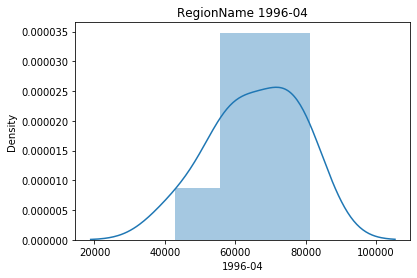

In [28]:
show_distplot(df_Ocala, 'RegionName', '1996-04')

C:\Users\DELL\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



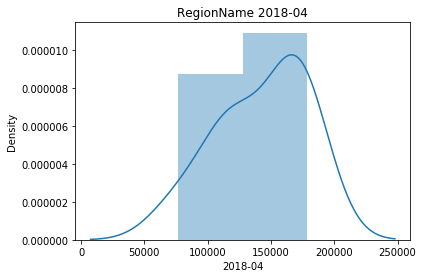

In [29]:
show_distplot(df_Ocala, 'RegionName', '2018-04')

Text(0.5, 1.0, 'LA by Region')

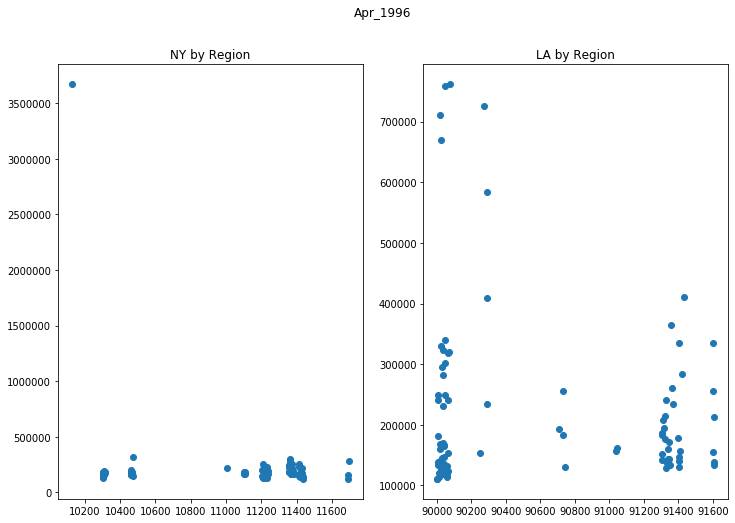

In [30]:
fig = plt.figure(figsize = (12, 8))
fig.suptitle('Apr_1996')

ax1 = plt.subplot(1, 2, 1) # just changed name of axis from ax1 to ax2 and plt number from 1 to 2
plt.scatter(df_NY['RegionName'], df_NY['1996-04'])
ax1.set_title('NY by Region')

ax2 = plt.subplot(1, 2, 2) # just changed name of axis from ax2 to ax3 and plt number from 2 to 3
plt.scatter(df_LA['RegionName'], df_LA['1996-04'])
ax2.set_title('LA by Region')

In [31]:
list(df_Ocala.columns)

['RegionID',
 'RegionName',
 'City',
 'State',
 'Metro',
 'CountyName',
 'SizeRank',
 '1996-04',
 '1996-05',
 '1996-06',
 '1996-07',
 '1996-08',
 '1996-09',
 '1996-10',
 '1996-11',
 '1996-12',
 '1997-01',
 '1997-02',
 '1997-03',
 '1997-04',
 '1997-05',
 '1997-06',
 '1997-07',
 '1997-08',
 '1997-09',
 '1997-10',
 '1997-11',
 '1997-12',
 '1998-01',
 '1998-02',
 '1998-03',
 '1998-04',
 '1998-05',
 '1998-06',
 '1998-07',
 '1998-08',
 '1998-09',
 '1998-10',
 '1998-11',
 '1998-12',
 '1999-01',
 '1999-02',
 '1999-03',
 '1999-04',
 '1999-05',
 '1999-06',
 '1999-07',
 '1999-08',
 '1999-09',
 '1999-10',
 '1999-11',
 '1999-12',
 '2000-01',
 '2000-02',
 '2000-03',
 '2000-04',
 '2000-05',
 '2000-06',
 '2000-07',
 '2000-08',
 '2000-09',
 '2000-10',
 '2000-11',
 '2000-12',
 '2001-01',
 '2001-02',
 '2001-03',
 '2001-04',
 '2001-05',
 '2001-06',
 '2001-07',
 '2001-08',
 '2001-09',
 '2001-10',
 '2001-11',
 '2001-12',
 '2002-01',
 '2002-02',
 '2002-03',
 '2002-04',
 '2002-05',
 '2002-06',
 '2002-07',
 '2

In [32]:
for x in list(df_Ocala.columns)[2:]:
    print(x)

City
State
Metro
CountyName
SizeRank
1996-04
1996-05
1996-06
1996-07
1996-08
1996-09
1996-10
1996-11
1996-12
1997-01
1997-02
1997-03
1997-04
1997-05
1997-06
1997-07
1997-08
1997-09
1997-10
1997-11
1997-12
1998-01
1998-02
1998-03
1998-04
1998-05
1998-06
1998-07
1998-08
1998-09
1998-10
1998-11
1998-12
1999-01
1999-02
1999-03
1999-04
1999-05
1999-06
1999-07
1999-08
1999-09
1999-10
1999-11
1999-12
2000-01
2000-02
2000-03
2000-04
2000-05
2000-06
2000-07
2000-08
2000-09
2000-10
2000-11
2000-12
2001-01
2001-02
2001-03
2001-04
2001-05
2001-06
2001-07
2001-08
2001-09
2001-10
2001-11
2001-12
2002-01
2002-02
2002-03
2002-04
2002-05
2002-06
2002-07
2002-08
2002-09
2002-10
2002-11
2002-12
2003-01
2003-02
2003-03
2003-04
2003-05
2003-06
2003-07
2003-08
2003-09
2003-10
2003-11
2003-12
2004-01
2004-02
2004-03
2004-04
2004-05
2004-06
2004-07
2004-08
2004-09
2004-10
2004-11
2004-12
2005-01
2005-02
2005-03
2005-04
2005-05
2005-06
2005-07
2005-08
2005-09
2005-10
2005-11
2005-12
2006-01
2006-02
2006-03
200

#### Finding Min & Max value for Ocala each Year

In [33]:
min_dict = {}
for x in list(df_Ocala.columns)[1:]:
    min_dict[x] = df_Ocala[x].min() 

In [34]:
min_dict

{'RegionName': 34470,
 'City': 'Ocala',
 'State': 'FL',
 'Metro': 'Ocala',
 'CountyName': 'Marion',
 'SizeRank': 3448,
 '1996-04': 43000.0,
 '1996-05': 43200.0,
 '1996-06': 43300.0,
 '1996-07': 43400.0,
 '1996-08': 43400.0,
 '1996-09': 43400.0,
 '1996-10': 43500.0,
 '1996-11': 43600.0,
 '1996-12': 43900.0,
 '1997-01': 44300.0,
 '1997-02': 44700.0,
 '1997-03': 45000.0,
 '1997-04': 45300.0,
 '1997-05': 45500.0,
 '1997-06': 45600.0,
 '1997-07': 45600.0,
 '1997-08': 45600.0,
 '1997-09': 45600.0,
 '1997-10': 45700.0,
 '1997-11': 46000.0,
 '1997-12': 46400.0,
 '1998-01': 47000.0,
 '1998-02': 47500.0,
 '1998-03': 48000.0,
 '1998-04': 48500.0,
 '1998-05': 48900.0,
 '1998-06': 49200.0,
 '1998-07': 49400.0,
 '1998-08': 49600.0,
 '1998-09': 49800.0,
 '1998-10': 50000.0,
 '1998-11': 50400.0,
 '1998-12': 50900.0,
 '1999-01': 51500.0,
 '1999-02': 52100.0,
 '1999-03': 52600.0,
 '1999-04': 53000.0,
 '1999-05': 53100.0,
 '1999-06': 53100.0,
 '1999-07': 52900.0,
 '1999-08': 52600.0,
 '1999-09': 52200.0,

In [35]:
max_dict = {}
for x in list(df_Ocala.columns)[1:]:
    max_dict[x] = df_Ocala[x].max() 

In [36]:
max_dict

{'RegionName': 34482,
 'City': 'Ocala',
 'State': 'FL',
 'Metro': 'Ocala',
 'CountyName': 'Marion',
 'SizeRank': 7833,
 '1996-04': 81300.0,
 '1996-05': 81400.0,
 '1996-06': 81500.0,
 '1996-07': 81700.0,
 '1996-08': 82000.0,
 '1996-09': 82300.0,
 '1996-10': 82700.0,
 '1996-11': 83100.0,
 '1996-12': 83500.0,
 '1997-01': 83800.0,
 '1997-02': 84200.0,
 '1997-03': 84500.0,
 '1997-04': 84700.0,
 '1997-05': 85000.0,
 '1997-06': 85200.0,
 '1997-07': 85400.0,
 '1997-08': 85500.0,
 '1997-09': 85600.0,
 '1997-10': 85700.0,
 '1997-11': 85800.0,
 '1997-12': 86000.0,
 '1998-01': 86200.0,
 '1998-02': 86500.0,
 '1998-03': 86900.0,
 '1998-04': 87300.0,
 '1998-05': 87900.0,
 '1998-06': 88600.0,
 '1998-07': 89500.0,
 '1998-08': 90500.0,
 '1998-09': 91700.0,
 '1998-10': 93000.0,
 '1998-11': 94300.0,
 '1998-12': 95800.0,
 '1999-01': 97300.0,
 '1999-02': 98800.0,
 '1999-03': 100600.0,
 '1999-04': 102300.0,
 '1999-05': 103900.0,
 '1999-06': 105100.0,
 '1999-07': 106300.0,
 '1999-08': 107300.0,
 '1999-09': 10

#### Dropping Columns for testing df_Ocala

In [37]:
df_Ocala=df_Ocala.drop(["RegionID", "City", "State", "Metro", "CountyName", "SizeRank"], axis=1)

In [38]:
df_Ocala.head() 

,RegionName,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
3447,34472,56400.0,57100.0,57700.0,58100.0,58400.0,58500.0,58500.0,58400.0,58400.0,58500.0,58600.0,58700.0,58800.0,59100.0,59400.0,59700.0,60100.0,60400.0,60700.0,60800.0,60900.0,61000.0,61100.0,61000.0,61000.0,61100.0,61400.0,61800.0,62300.0,62900.0,63400.0,63900.0,64500.0,65300.0,66200.0,66800.0,67100.0,67100.0,66800.0,66000.0,64800.0,63600.0,62300.0,61100.0,60000.0,59300.0,58800.0,58400.0,58100.0,57800.0,57600.0,57500.0,57500.0,57500.0,57600.0,57800.0,58100.0,58500.0,59100.0,59600.0,60100.0,60400.0,60700.0,61000.0,61400.0,61900.0,62400.0,62900.0,63500.0,64200.0,65000.0,65900.0,66600.0,67100.0,67600.0,68000.0,68500.0,69000.0,69600.0,70800.0,72200.0,72200.0,70800.0,69500.0,68700.0,68500.0,68700.0,69300.0,70100.0,71300.0,72600.0,73800.0,74800.0,75900.0,77400.0,79100.0,80800.0,82500.0,84200.0,85900.0,87600.0,89200.0,91000.0,92600.0,94500.0,96800.0,99200.0,101700.0,104500.0,107700.0,111600.0,116100.0,121000.0,126000.0,130600.0,134600.0,138200.0,141800.0,145400.0,149400.0,153200.0,156400.0,158700.0,160300.0,161000.0,161100.0,160600.0,159900.0,159000.0,158200.0,157400.0,156800.0,156300.0,155400.0,153800.0,152100.0,150400.0,148700.0,146800.0,144800.0,142600.0,140200.0,137600.0,135000.0,132500.0,129700.0,126600.0,123900.0,121600.0,119600.0,117400.0,115300.0,113200.0,111200.0,109000.0,107100.0,105300.0,103400.0,101100.0,98700.0,96200.0,93600.0,90900.0,88500.0,86700.0,85500.0,85200.0,83900.0,81700.0,80100.0,79100.0,77600.0,76000.0,75000.0,74800.0,74500.0,73700.0,73300.0,73200.0,72500.0,71100.0,70000.0,69900.0,70100.0,69800.0,69300.0,68800.0,68700.0,69000.0,69200.0,69400.0,70300.0,71700.0,72600.0,72700.0,72800.0,73100.0,73500.0,74100.0,75000.0,75600.0,75700.0,75300.0,75200.0,75400.0,75900.0,77000.0,78300.0,79400.0,80100.0,80700.0,81400.0,82100.0,82300.0,82000.0,81900.0,82200.0,82500.0,82700.0,83100,83400,83600,83900,83700,83700,84000,84400,84600

#### Renaming RegionName to Zipcode

In [39]:
df_Ocala.rename(columns={'RegionName': 'Zipcode'}, inplace=True)
df_Ocala.head()

,Zipcode,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
3447,34472,56400.0,57100.0,57700.0,58100.0,58400.0,58500.0,58500.0,58400.0,58400.0,58500.0,58600.0,58700.0,58800.0,59100.0,59400.0,59700.0,60100.0,60400.0,60700.0,60800.0,60900.0,61000.0,61100.0,61000.0,61000.0,61100.0,61400.0,61800.0,62300.0,62900.0,63400.0,63900.0,64500.0,65300.0,66200.0,66800.0,67100.0,67100.0,66800.0,66000.0,64800.0,63600.0,62300.0,61100.0,60000.0,59300.0,58800.0,58400.0,58100.0,57800.0,57600.0,57500.0,57500.0,57500.0,57600.0,57800.0,58100.0,58500.0,59100.0,59600.0,60100.0,60400.0,60700.0,61000.0,61400.0,61900.0,62400.0,62900.0,63500.0,64200.0,65000.0,65900.0,66600.0,67100.0,67600.0,68000.0,68500.0,69000.0,69600.0,70800.0,72200.0,72200.0,70800.0,69500.0,68700.0,68500.0,68700.0,69300.0,70100.0,71300.0,72600.0,73800.0,74800.0,75900.0,77400.0,79100.0,80800.0,82500.0,84200.0,85900.0,87600.0,89200.0,91000.0,92600.0,94500.0,96800.0,99200.0,101700.0,104500.0,107700.0,111600.0,116100.0,121000.0,126000.0,130600.0,134600.0,138200.0,141800.0,145400.0,149400.0,153200.0,156400.0,158700.0,160300.0,161000.0,161100.0,160600.0,159900.0,159000.0,158200.0,157400.0,156800.0,156300.0,155400.0,153800.0,152100.0,150400.0,148700.0,146800.0,144800.0,142600.0,140200.0,137600.0,135000.0,132500.0,129700.0,126600.0,123900.0,121600.0,119600.0,117400.0,115300.0,113200.0,111200.0,109000.0,107100.0,105300.0,103400.0,101100.0,98700.0,96200.0,93600.0,90900.0,88500.0,86700.0,85500.0,85200.0,83900.0,81700.0,80100.0,79100.0,77600.0,76000.0,75000.0,74800.0,74500.0,73700.0,73300.0,73200.0,72500.0,71100.0,70000.0,69900.0,70100.0,69800.0,69300.0,68800.0,68700.0,69000.0,69200.0,69400.0,70300.0,71700.0,72600.0,72700.0,72800.0,73100.0,73500.0,74100.0,75000.0,75600.0,75700.0,75300.0,75200.0,75400.0,75900.0,77000.0,78300.0,79400.0,80100.0,80700.0,81400.0,82100.0,82300.0,82000.0,81900.0,82200.0,82500.0,82700.0,83100,83400,83600,83900,83700,83700,84000,84400,84600,85

#### Reseting Index

In [40]:
df_Ocala.set_index('Zipcode', inplace=True)

In [41]:
df_Ocala.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 34472 to 34475
Columns: 265 entries, 1996-04 to 2018-04
dtypes: float64(219), int64(46)
memory usage: 18.7 KB


#### Testing the Transpose Feature Dates to Row

In [42]:
df_Ocala=df_Ocala.transpose()
df_Ocala.head() 

Zipcode,34472,34471,34476,34470,34482,34480,34474,34479,34475
1996-04,56400.0,81300.0,72200.0,59400.0,66900.0,77900.0,76000.0,58100.0,43000.0
1996-05,57100.0,81400.0,73400.0,59700.0,68000.0,78100.0,76600.0,58300.0,43200.0
1996-06,57700.0,81500.0,74500.0,59900.0,68800.0,78300.0,77100.0,58400.0,43300.0
1996-07,58100.0,81700.0,75200.0,60200.0,69600.0,78600.0,77500.0,58500.0,43400.0
1996-08,58400.0,82000.0,75800.0,60300.0,70100.0,78900.0,77800.0,58600.0,43400.0


In [43]:
df_Ocala.describe() 

Zipcode,34472,34471,34476,34470,34482,34480,34474,34479,34475
count,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000
mean,87843.773585,139155.094340,130906.415094,92711.320755,132369.811321,129782.264151,141436.981132,87138.490566,62389.811321
std,28886.964413,37605.235956,39912.359439,27278.585649,40441.109377,35389.562890,38527.669002,25941.876129,18771.949021
min,56400.000000,81300.000000,71300.000000,59400.000000,66900.000000,77900.000000,76000.000000,58100.000000,43000.000000
25%,66000.000000,113400.000000,105700.000000,75400.000000,108200.000000,104500.000000,119300.000000,70100.000000,49800.000000
50%,79100.000000,133000.000000,123600.000000,81600.000000,126700.000000,121500.000000,132800.000000,76600.000000,53300.000000
75%,103400.000000,162000.000000,149700.000000,104300.000000,149900.000000,148600.000000,162100.000000,97700.000000,68900.000000
max,161100.000000,231600.000000,231200.000000,163800.000000,228300.000000,220000.000000,230400.000000,156200.000000,110000.000000


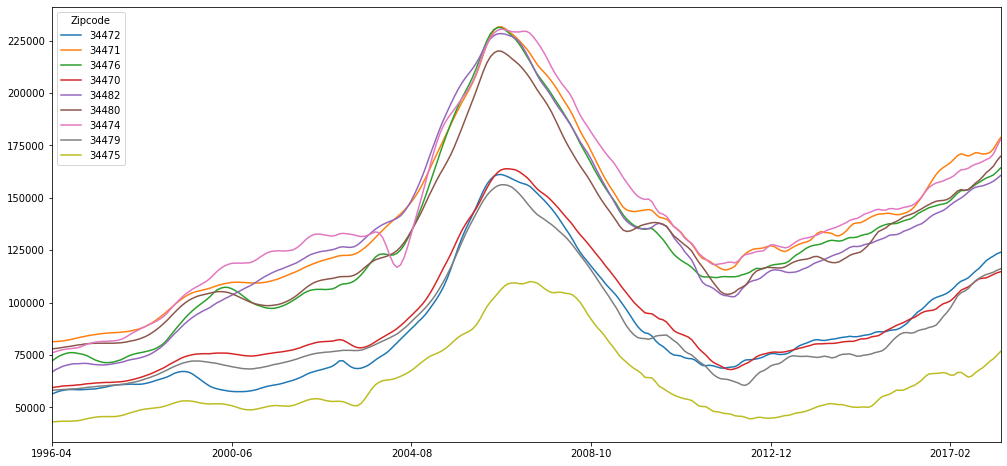

In [44]:
df_Ocala.plot(figsize=(17,8))

#### Observation : Evidently this time series df_Ocala is not stationary in nature

#### Zipcodes with Top 5 Mean 

In [45]:
Ocala_mean = df_Ocala.mean()

In [46]:
Ocala_mean.head(10) 

Zipcode
34472     87843.773585
34471    139155.094340
34476    130906.415094
34470     92711.320755
34482    132369.811321
34480    129782.264151
34474    141436.981132
34479     87138.490566
34475     62389.811321
dtype: float64

In [47]:
Ocala_mean.nlargest() 

Zipcode
34474    141436.981132
34471    139155.094340
34482    132369.811321
34476    130906.415094
34480    129782.264151
dtype: float64

#### Converting index to datetime 

In [48]:
df_Ocala.index=pd.to_datetime(df_Ocala.index)
df_Ocala.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 265 entries, 1996-04-01 to 2018-04-01
Data columns (total 9 columns):
34472    265 non-null float64
34471    265 non-null float64
34476    265 non-null float64
34470    265 non-null float64
34482    265 non-null float64
34480    265 non-null float64
34474    265 non-null float64
34479    265 non-null float64
34475    265 non-null float64
dtypes: float64(9)
memory usage: 20.7 KB


#### Converting column names to string

In [49]:
df_Ocala.columns = df_Ocala.columns.astype(str)

### Dickey_Fuller Test

In [50]:
from statsmodels.tsa.stattools import adfuller

#create a function that will help us to quickly 
def test_stationarity(timeseries, window):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=window).mean()
    rolstd = timeseries.rolling(window=window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries.iloc[window:], color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    return dfoutput

##### Testing Stationary

In [51]:
# #test the stationarity of the untransformed dataset
# test_stationarity(df_Ocala, 18)

- As the rolling mean for all zip codes shows, 
- The assumption of stationarity is not met, as rolling mean is not constant over time
- To be tested with individual Zip codes

#### 34471

In [52]:
data71 = df_Ocala["34471"]
dftest = adfuller(data71)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)

print ('Results of Dickey-Fuller Test:')

print(dfoutput)

if dftest[0] < dftest[4]['5%']:
    print ('Reject Hypothesis - Time series is Stationary')
else:
    print ('Failed to Reject Hypothesis -time series is Non Stationary')

(-2.1950138094249128, 0.20806013130126033, 5, 259, {'1%': -3.4558530692911504, '5%': -2.872764881778665, '10%': -2.572751643088207}, 3621.1883399817707)
Results of Dickey-Fuller Test:
Test Statistic                  -2.195014
p-value                          0.208060
#Lags Used                       5.000000
Number of Observations Used    259.000000
Critical Value (1%)             -3.455853
Critical Value (5%)             -2.872765
Critical Value (10%)            -2.572752
dtype: float64
Failed to Reject Hypothesis -time series is Non Stationary


##### Testing Stationary

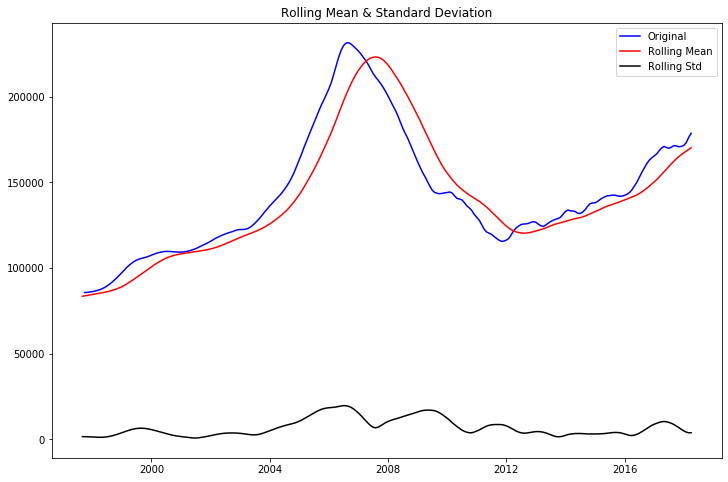

Results of Dickey-Fuller Test:
Test Statistic                  -2.195014
p-value                          0.208060
#Lags Used                       5.000000
Number of Observations Used    259.000000
Critical Value (1%)             -3.455853
Critical Value (5%)             -2.872765
Critical Value (10%)            -2.572752
dtype: float64


In [53]:
output34471 = test_stationarity(df_Ocala['34471'], 18)

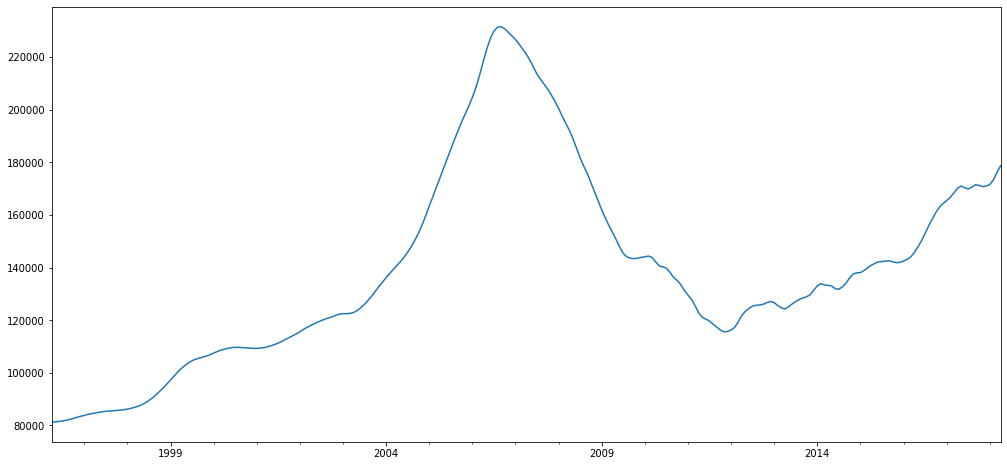

In [54]:
df_Ocala['34471'].plot(figsize=(17,8)) 

#### 34474

In [55]:
data74 = df_Ocala["34474"]
dftest = adfuller(data74)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)

print ('Results of Dickey-Fuller Test:')

print(dfoutput)

if dftest[0] < dftest[4]['5%']:
    print ('Reject Hypothesis - Time series is Stationary')
else:
    print ('Failed to Reject Hypothesis -time series is Non Stationary')

(-2.5881668950461707, 0.09546767566367664, 15, 249, {'1%': -3.4568881317725864, '5%': -2.8732185133016057, '10%': -2.5729936189738876}, 3710.147778425054)
Results of Dickey-Fuller Test:
Test Statistic                  -2.588167
p-value                          0.095468
#Lags Used                      15.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64
Failed to Reject Hypothesis -time series is Non Stationary


##### Testing Stationary

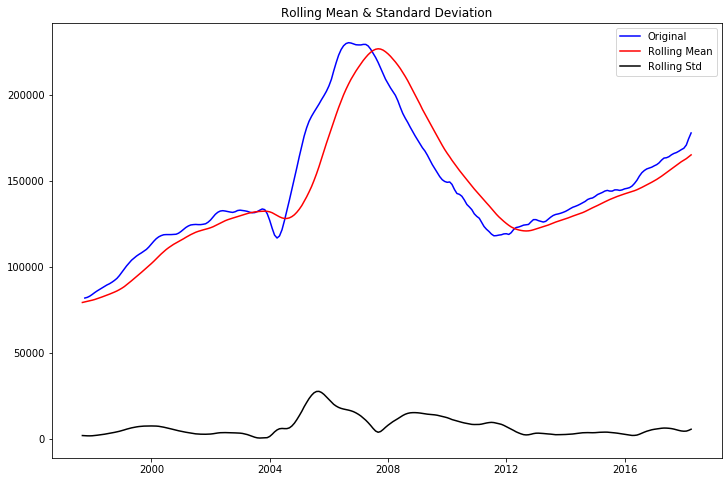

Results of Dickey-Fuller Test:
Test Statistic                  -2.588167
p-value                          0.095468
#Lags Used                      15.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


In [56]:
output34474 = test_stationarity(df_Ocala['34474'], 18)

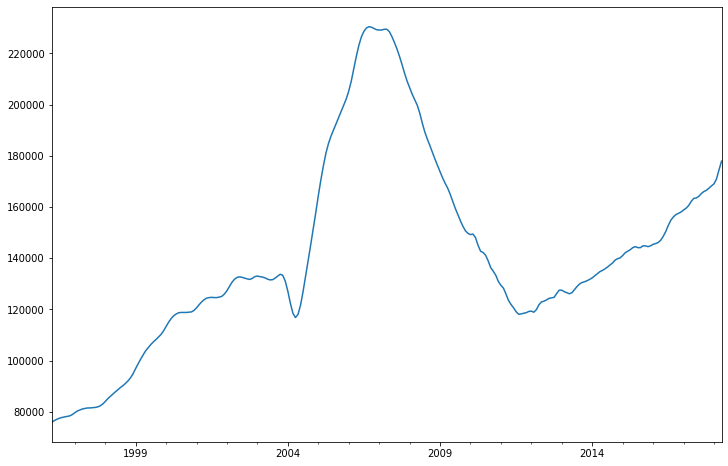

In [57]:
df_Ocala['34474'].plot(figsize=(12, 8)) 

#### 34476

In [58]:
data76 = df_Ocala["34476"]
dftest = adfuller(data76)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)

print ('Results of Dickey-Fuller Test:')

print(dfoutput)

if dftest[0] < dftest[4]['5%']:
    print ('Reject Hypothesis - Time series is Stationary')
else:
    print ('Failed to Reject Hypothesis -time series is Non Stationary')

(-2.4480120824467955, 0.12864115357430445, 5, 259, {'1%': -3.4558530692911504, '5%': -2.872764881778665, '10%': -2.572751643088207}, 3519.776473627016)
Results of Dickey-Fuller Test:
Test Statistic                  -2.448012
p-value                          0.128641
#Lags Used                       5.000000
Number of Observations Used    259.000000
Critical Value (1%)             -3.455853
Critical Value (5%)             -2.872765
Critical Value (10%)            -2.572752
dtype: float64
Failed to Reject Hypothesis -time series is Non Stationary


##### Testing Stationary

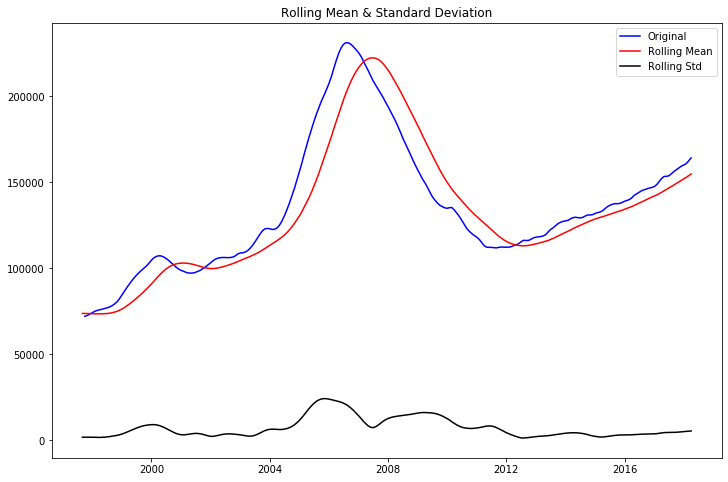

Results of Dickey-Fuller Test:
Test Statistic                  -2.448012
p-value                          0.128641
#Lags Used                       5.000000
Number of Observations Used    259.000000
Critical Value (1%)             -3.455853
Critical Value (5%)             -2.872765
Critical Value (10%)            -2.572752
dtype: float64


In [59]:
output34476 = test_stationarity(df_Ocala['34476'], 18)

#### 34480

In [60]:
data80 = df_Ocala["34480"]
dftest = adfuller(data80)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)

print ('Results of Dickey-Fuller Test:')

print(dfoutput)

if dftest[0] < dftest[4]['5%']:
    print ('Reject Hypothesis - Time series is Stationary')
else:
    print ('Failed to Reject Hypothesis -time series is Non Stationary')

(-2.137100607883889, 0.22986022175781534, 9, 255, {'1%': -3.4562572510874396, '5%': -2.8729420379793598, '10%': -2.5728461399461744}, 3546.402687136926)
Results of Dickey-Fuller Test:
Test Statistic                  -2.137101
p-value                          0.229860
#Lags Used                       9.000000
Number of Observations Used    255.000000
Critical Value (1%)             -3.456257
Critical Value (5%)             -2.872942
Critical Value (10%)            -2.572846
dtype: float64
Failed to Reject Hypothesis -time series is Non Stationary


##### Testing Stationary

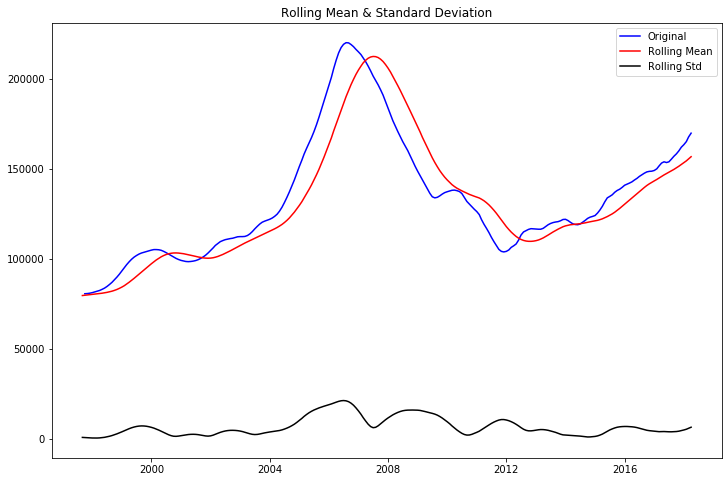

Results of Dickey-Fuller Test:
Test Statistic                  -2.137101
p-value                          0.229860
#Lags Used                       9.000000
Number of Observations Used    255.000000
Critical Value (1%)             -3.456257
Critical Value (5%)             -2.872942
Critical Value (10%)            -2.572846
dtype: float64


In [61]:
output34480 = test_stationarity(df_Ocala['34480'], 18)

#### 34482

In [62]:
data82 = df_Ocala["34482"]
dftest = adfuller(data82)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)

print ('Results of Dickey-Fuller Test:')

print(dfoutput) 

if dftest[0] < dftest[4]['5%']:
    print ('Reject Hypothesis - Time series is Stationary')
else:
    print ('Failed to Reject Hypothesis -time series is Non Stationary')

(-2.756721601345477, 0.06472663760577035, 13, 251, {'1%': -3.4566744514553016, '5%': -2.8731248767783426, '10%': -2.5729436702592023}, 3568.730830812835)
Results of Dickey-Fuller Test:
Test Statistic                  -2.756722
p-value                          0.064727
#Lags Used                      13.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (5%)             -2.873125
Critical Value (10%)            -2.572944
dtype: float64
Failed to Reject Hypothesis -time series is Non Stationary


##### Testing Stationary

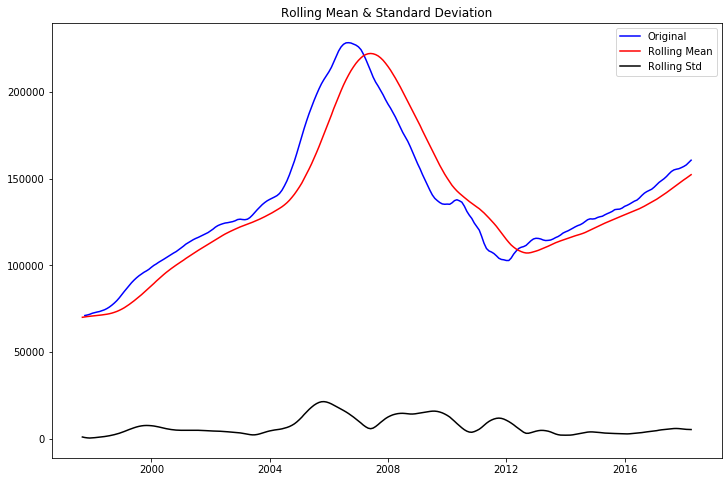

Results of Dickey-Fuller Test:
Test Statistic                  -2.756722
p-value                          0.064727
#Lags Used                      13.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (5%)             -2.873125
Critical Value (10%)            -2.572944
dtype: float64


In [63]:
output34482 = test_stationarity(df_Ocala['34482'], 18)

#### Preparing a DataFrame for Results of Dickey-Fuller Test

In [64]:
df_dft =pd.concat([output34471, output34474, output34476,output34480,output34482 ], axis=1)

In [65]:
df_dft

,0,1,2,3,4
Test Statistic,-2.195014,-2.588167,-2.448012,-2.137101,-2.756722
p-value,0.208060,0.095468,0.128641,0.229860,0.064727
#Lags Used,5.000000,15.000000,5.000000,9.000000,13.000000
Number of Observations Used,259.000000,249.000000,259.000000,255.000000,251.000000
Critical Value (1%),-3.455853,-3.456888,-3.455853,-3.456257,-3.456674
Critical Value (5%),-2.872765,-2.873219,-2.872765,-2.872942,-2.873125
Critical Value (10%),-2.572752,-2.572994,-2.572752,-2.572846,-2.572944


- 34474 & 34482 have the lowest p-value , higher lags
- Test statistics less than critical value Reject the null hypothesis 
- Test statistics greater than critical value fail to Reject the null hypothesis 

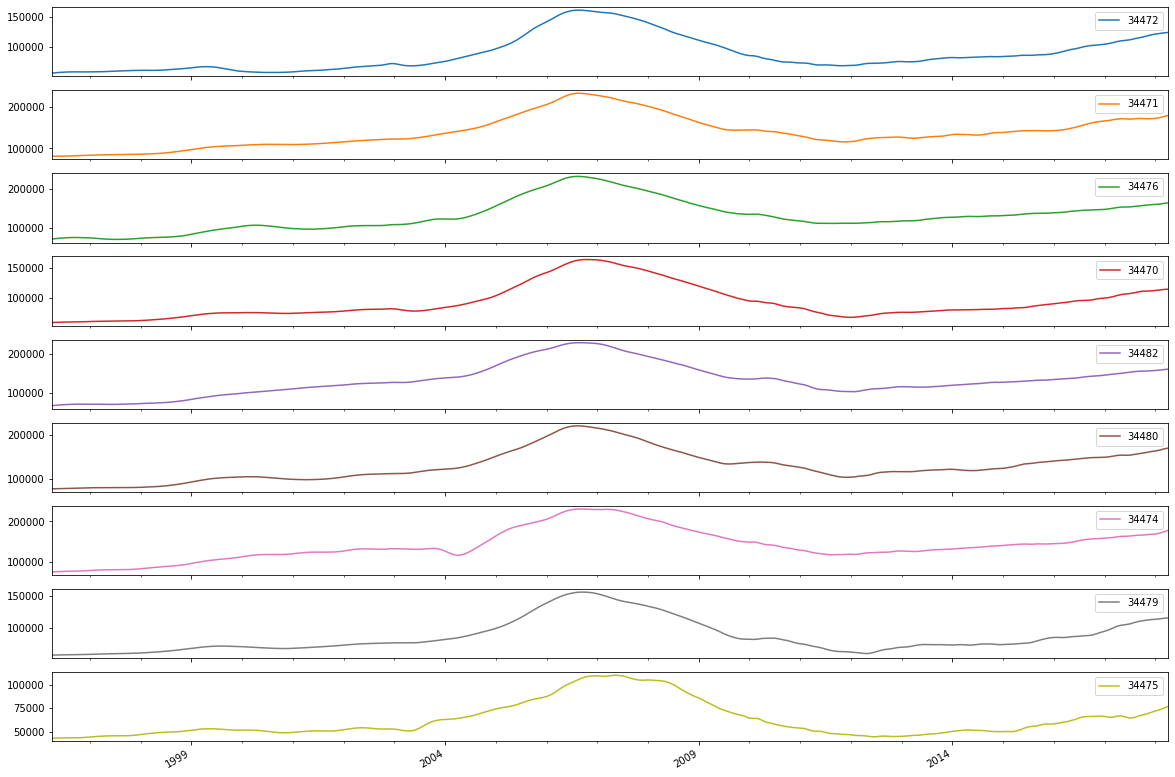

In [66]:
df_Ocala.plot(figsize = (20,15), subplots=True, legend=True)
plt.show()

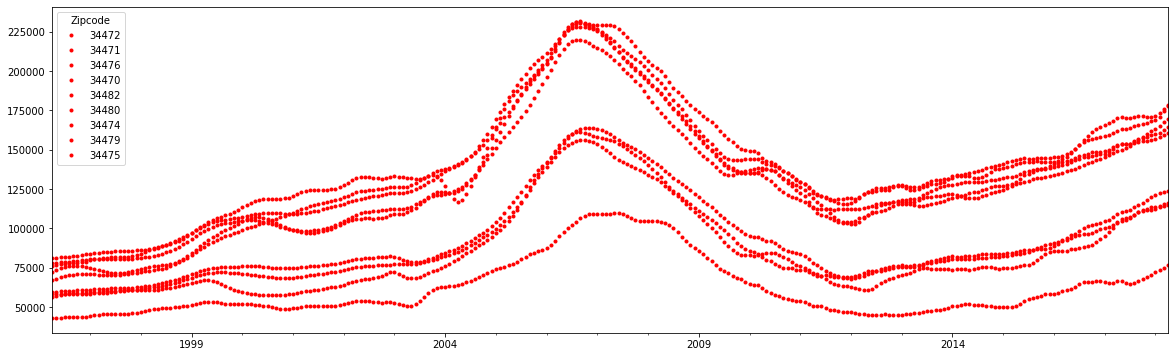

In [67]:
df_Ocala.plot(figsize = (20,6), style = ".r")
plt.show()

In [68]:
df_Ocala.shape

(265, 9)

### Log Transformation

In [69]:
def log_transformation(ts_data_frame):
    for col in ts_data_frame.columns:
        col= pd.Series(np.log(df_Ocala[col]))
        dftest = adfuller(col)
        dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
        for key,value in dftest[4].items():
            dfoutput['Critical Value (%s)'%key] = value
            print(dftest)

            print ('Results of Dickey-Fuller Test:')

            print(dfoutput)

In [70]:
log_transformation(df_Ocala)

(-2.5448997474419635, 0.104928313436559, 6, 258, {'1%': -3.455952927706342, '5%': -2.8728086526320302, '10%': -2.572774990685656}, -2103.721925101504)
Results of Dickey-Fuller Test:
Test Statistic                  -2.544900
p-value                          0.104928
#Lags Used                       6.000000
Number of Observations Used    258.000000
Critical Value (1%)             -3.455953
dtype: float64
(-2.5448997474419635, 0.104928313436559, 6, 258, {'1%': -3.455952927706342, '5%': -2.8728086526320302, '10%': -2.572774990685656}, -2103.721925101504)
Results of Dickey-Fuller Test:
Test Statistic                  -2.544900
p-value                          0.104928
#Lags Used                       6.000000
Number of Observations Used    258.000000
Critical Value (1%)             -3.455953
Critical Value (5%)             -2.872809
dtype: float64
(-2.5448997474419635, 0.104928313436559, 6, 258, {'1%': -3.455952927706342, '5%': -2.8728086526320302, '10%': -2.572774990685656}, -2103.7219251

#### 34471

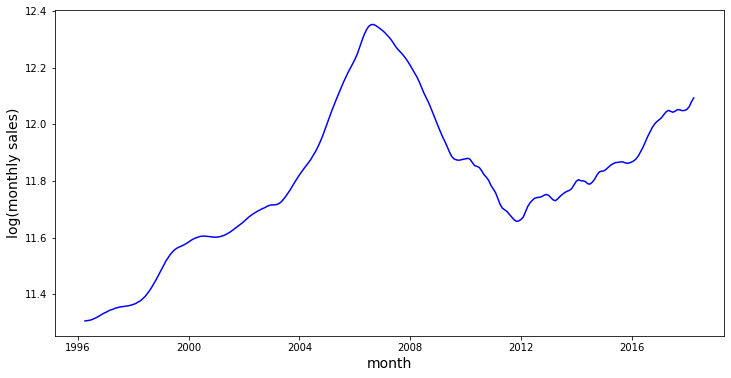

In [71]:
log_71 = pd.Series(np.log(df_Ocala["34471"]))
fig = plt.figure(figsize=(12,6))
plt.plot(log_71, color="blue")
plt.xlabel("month", fontsize=14)
plt.ylabel("log(monthly sales)", fontsize=14)
plt.show()

In [72]:
data71_log = log_71
dftest = adfuller(data71_log)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)

print ('Results of Dickey-Fuller Test:')

print(dfoutput)

if dftest[0] < dftest[4]['5%']:
    print ('Reject Hypothesis - Time series is Stationary')
else:
    print ('Failed to Reject Hypothesis -time series is Non Stationary')

(-1.9027491513111876, 0.3307689304745169, 7, 257, {'1%': -3.4560535712549925, '5%': -2.8728527662442334, '10%': -2.5727985212493754}, -2269.2292363749852)
Results of Dickey-Fuller Test:
Test Statistic                  -1.902749
p-value                          0.330769
#Lags Used                       7.000000
Number of Observations Used    257.000000
Critical Value (1%)             -3.456054
Critical Value (5%)             -2.872853
Critical Value (10%)            -2.572799
dtype: float64
Failed to Reject Hypothesis -time series is Non Stationary


##### Testing Stationary post log_tran

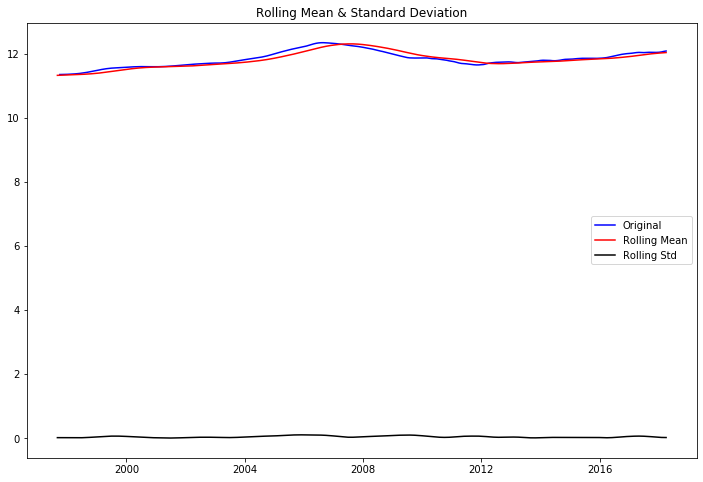

Results of Dickey-Fuller Test:
Test Statistic                  -1.902749
p-value                          0.330769
#Lags Used                       7.000000
Number of Observations Used    257.000000
Critical Value (1%)             -3.456054
Critical Value (5%)             -2.872853
Critical Value (10%)            -2.572799
dtype: float64


In [73]:
log_output34471 = test_stationarity(data71_log, 18)

#### 34474

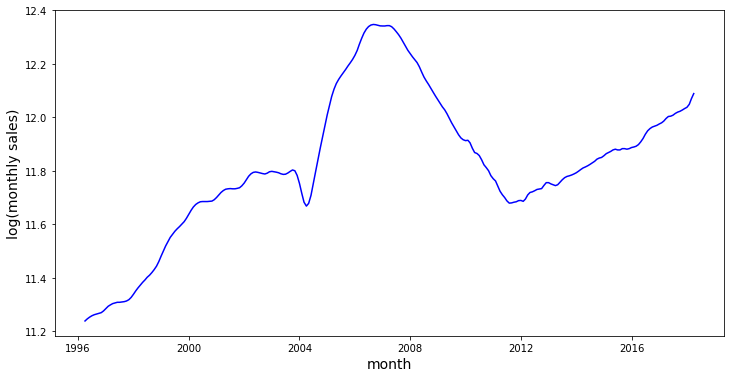

In [74]:
log_74 = pd.Series(np.log(df_Ocala["34474"]))
fig = plt.figure(figsize=(12,6))
plt.plot(log_74, color="blue")
plt.xlabel("month", fontsize=14)
plt.ylabel("log(monthly sales)", fontsize=14)
plt.show()

In [75]:
data74_log = log_74
dftest = adfuller(data74_log)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)

print ('Results of Dickey-Fuller Test:')

print(dfoutput)

if dftest[0] < dftest[4]['5%']:
    print ('Reject Hypothesis - Time series is Stationary')
else:
    print ('Failed to Reject Hypothesis -time series is Non Stationary')

(-2.6053466960864506, 0.09189724166866842, 15, 249, {'1%': -3.4568881317725864, '5%': -2.8732185133016057, '10%': -2.5729936189738876}, -2162.663973915521)
Results of Dickey-Fuller Test:
Test Statistic                  -2.605347
p-value                          0.091897
#Lags Used                      15.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64
Failed to Reject Hypothesis -time series is Non Stationary


##### Testing Stationary post log_tran

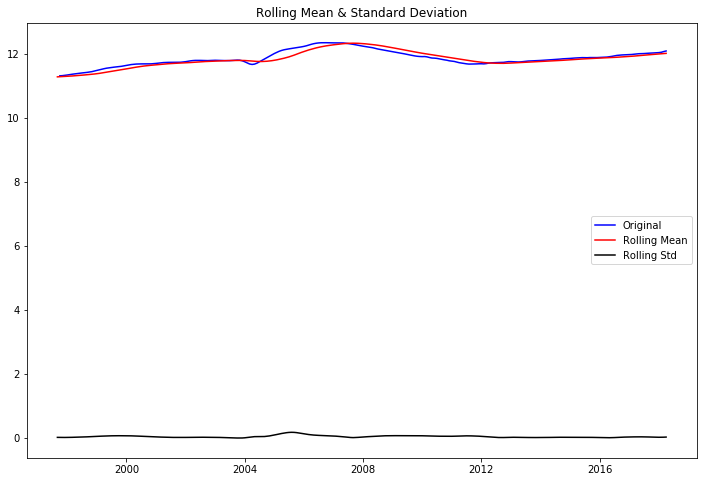

Results of Dickey-Fuller Test:
Test Statistic                  -2.605347
p-value                          0.091897
#Lags Used                      15.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


In [76]:
log_output34474 = test_stationarity(data74_log, 18)

#### 34476

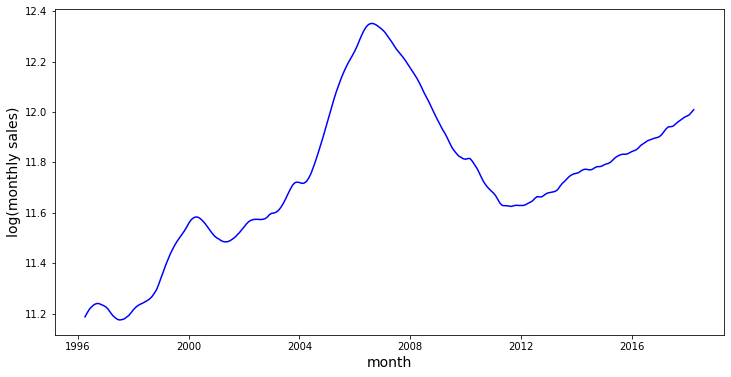

In [77]:
log_76 = pd.Series(np.log(df_Ocala["34476"]))
fig = plt.figure(figsize=(12,6))
plt.plot(log_76, color="blue")
plt.xlabel("month", fontsize=14)
plt.ylabel("log(monthly sales)", fontsize=14)
plt.show()

In [78]:
data76_log = log_76
dftest = adfuller(data76_log)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)

print ('Results of Dickey-Fuller Test:')

print(dfoutput)

if dftest[0] < dftest[4]['5%']:
    print ('Reject Hypothesis - Time series is Stationary')
else:
    print ('Failed to Reject Hypothesis -time series is Non Stationary')

(-2.1144247322545517, 0.23875404204735823, 5, 259, {'1%': -3.4558530692911504, '5%': -2.872764881778665, '10%': -2.572751643088207}, -2313.413773932448)
Results of Dickey-Fuller Test:
Test Statistic                  -2.114425
p-value                          0.238754
#Lags Used                       5.000000
Number of Observations Used    259.000000
Critical Value (1%)             -3.455853
Critical Value (5%)             -2.872765
Critical Value (10%)            -2.572752
dtype: float64
Failed to Reject Hypothesis -time series is Non Stationary


##### Testing Stationary post log_tran

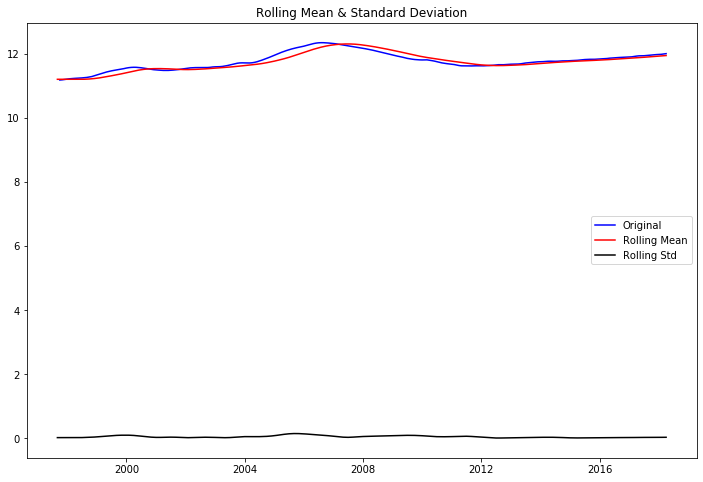

Results of Dickey-Fuller Test:
Test Statistic                  -2.114425
p-value                          0.238754
#Lags Used                       5.000000
Number of Observations Used    259.000000
Critical Value (1%)             -3.455853
Critical Value (5%)             -2.872765
Critical Value (10%)            -2.572752
dtype: float64


In [79]:
log_output34476 = test_stationarity(data76_log, 18)

#### 34480

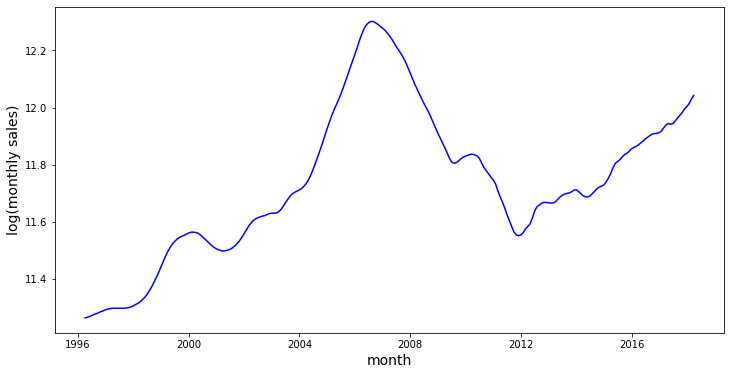

In [80]:
log_80 = pd.Series(np.log(df_Ocala["34480"]))
fig = plt.figure(figsize=(12,6))
plt.plot(log_80, color="blue")
plt.xlabel("month", fontsize=14)
plt.ylabel("log(monthly sales)", fontsize=14)
plt.show()

In [81]:
data80_log = log_80
dftest = adfuller(data80_log)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)

print ('Results of Dickey-Fuller Test:')

print(dfoutput)

if dftest[0] < dftest[4]['5%']:
    print ('Reject Hypothesis - Time series is Stationary')
else:
    print ('Failed to Reject Hypothesis -time series is Non Stationary')

(-2.1428802421364446, 0.22762528837471735, 11, 253, {'1%': -3.4564641849494113, '5%': -2.873032730098417, '10%': -2.572894516864816}, -2305.32520172226)
Results of Dickey-Fuller Test:
Test Statistic                  -2.142880
p-value                          0.227625
#Lags Used                      11.000000
Number of Observations Used    253.000000
Critical Value (1%)             -3.456464
Critical Value (5%)             -2.873033
Critical Value (10%)            -2.572895
dtype: float64
Failed to Reject Hypothesis -time series is Non Stationary


##### Testing Stationary post log_tran

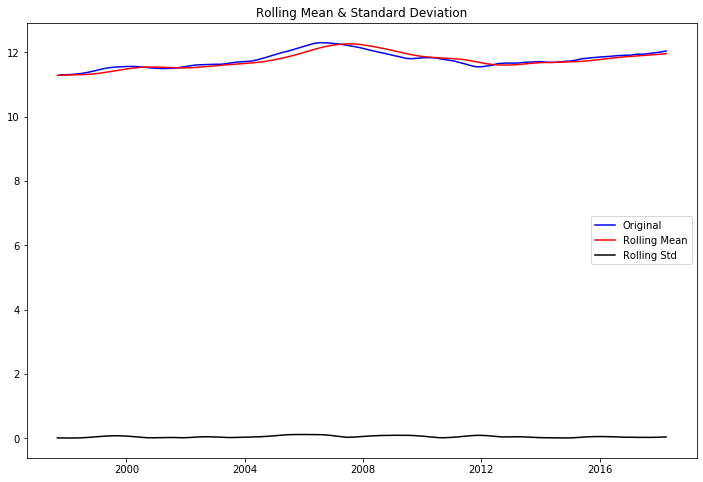

Results of Dickey-Fuller Test:
Test Statistic                  -2.142880
p-value                          0.227625
#Lags Used                      11.000000
Number of Observations Used    253.000000
Critical Value (1%)             -3.456464
Critical Value (5%)             -2.873033
Critical Value (10%)            -2.572895
dtype: float64


In [82]:
log_output34480 = test_stationarity(data80_log, 18)

#### 34482

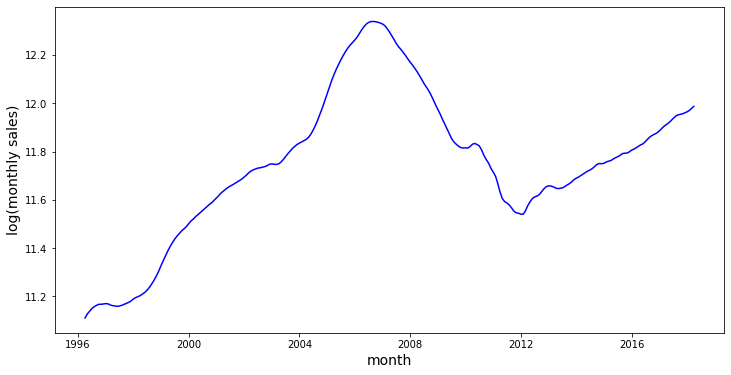

In [83]:
log_82 = pd.Series(np.log(df_Ocala["34482"]))
fig = plt.figure(figsize=(12,6))
plt.plot(log_82, color="blue")
plt.xlabel("month", fontsize=14)
plt.ylabel("log(monthly sales)", fontsize=14)
plt.show()

In [84]:
data82_log = log_82
dftest = adfuller(data82_log)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)

print ('Results of Dickey-Fuller Test:')

print(dfoutput)

if dftest[0] < dftest[4]['5%']:
    print ('Reject Hypothesis - Time series is Stationary')
else:
    print ('Failed to Reject Hypothesis -time series is Non Stationary')

(-2.6489843066326344, 0.08328980528085733, 13, 251, {'1%': -3.4566744514553016, '5%': -2.8731248767783426, '10%': -2.5729436702592023}, -2263.6824399458774)
Results of Dickey-Fuller Test:
Test Statistic                  -2.648984
p-value                          0.083290
#Lags Used                      13.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (5%)             -2.873125
Critical Value (10%)            -2.572944
dtype: float64
Failed to Reject Hypothesis -time series is Non Stationary


##### Testing Stationary post log_tran

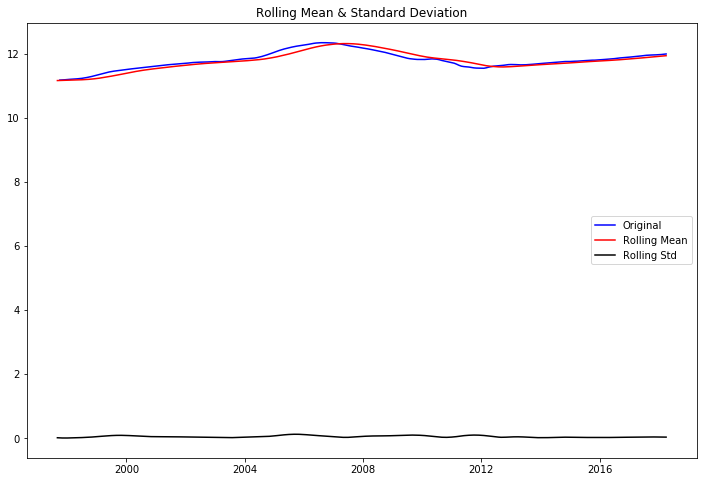

Results of Dickey-Fuller Test:
Test Statistic                  -2.648984
p-value                          0.083290
#Lags Used                      13.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (5%)             -2.873125
Critical Value (10%)            -2.572944
dtype: float64


In [85]:
log_output34482 = test_stationarity(data82_log, 18)

#### Preparing a DataFrame for Results of Dickey-Fuller Test post log transformation

In [86]:
df_dft_log =pd.concat([log_output34471,log_output34474, log_output34476, log_output34480,log_output34482], axis=1)

In [87]:
df_dft_log

,0,1,2,3,4
Test Statistic,-1.902749,-2.605347,-2.114425,-2.142880,-2.648984
p-value,0.330769,0.091897,0.238754,0.227625,0.083290
#Lags Used,7.000000,15.000000,5.000000,11.000000,13.000000
Number of Observations Used,257.000000,249.000000,259.000000,253.000000,251.000000
Critical Value (1%),-3.456054,-3.456888,-3.455853,-3.456464,-3.456674
Critical Value (5%),-2.872853,-2.873219,-2.872765,-2.873033,-2.873125
Critical Value (10%),-2.572799,-2.572994,-2.572752,-2.572895,-2.572944


In [91]:
df_dft

,0,1,2,3,4
Test Statistic,-2.195014,-2.588167,-2.448012,-2.137101,-2.756722
p-value,0.208060,0.095468,0.128641,0.229860,0.064727
#Lags Used,5.000000,15.000000,5.000000,9.000000,13.000000
Number of Observations Used,259.000000,249.000000,259.000000,255.000000,251.000000
Critical Value (1%),-3.455853,-3.456888,-3.455853,-3.456257,-3.456674
Critical Value (5%),-2.872765,-2.873219,-2.872765,-2.872942,-2.873125
Critical Value (10%),-2.572752,-2.572994,-2.572752,-2.572846,-2.572944


#### Differencing

No handles with labels found to put in legend.


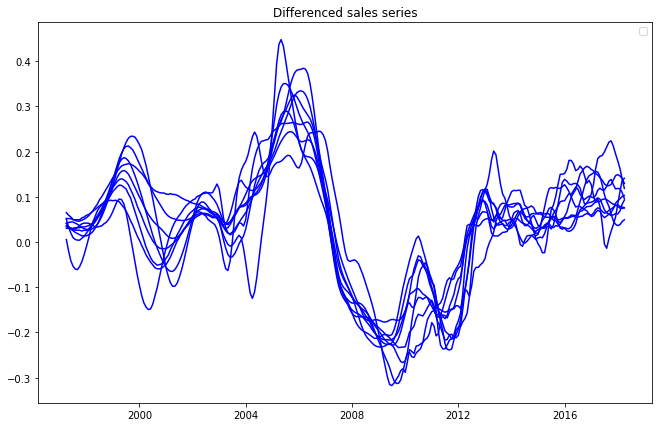

In [92]:
## rolling average set to 12 months
df_Ocala_log=np.log(df_Ocala) #log transformation first
Ocala_diff = df_Ocala_log.diff(periods=12) #need to check/verify what this is doing

fig = plt.figure(figsize=(11,7))
plt.plot(Ocala_diff, color='blue')
plt.legend(loc='best')
plt.title('Differenced sales series')
plt.show(block=False)

In [93]:
#missing the first rows at the beginning
Ocala_diff= Ocala_diff[12:]
Ocala_diff.head(10) 

Zipcode,34472,34471,34476,34470,34482,34480,34474,34479,34475
1997-04-01,0.041673,0.040970,0.005525,0.036368,0.050994,0.034073,0.064950,0.030511,0.052107
1997-05-01,0.034427,0.043276,-0.019258,0.032952,0.033264,0.031509,0.059549,0.030408,0.051872
1997-06-01,0.029037,0.044398,-0.041102,0.031227,0.020145,0.028951,0.055500,0.030356,0.051755
1997-07-01,0.027166,0.044292,-0.053255,0.027848,0.010007,0.025127,0.050325,0.030305,0.049448
1997-08-01,0.028694,0.041797,-0.059800,0.026188,0.005690,0.021317,0.047688,0.031909,0.049448
1997-09-01,0.031962,0.039314,-0.060953,0.026145,0.004246,0.018786,0.046345,0.031855,0.049448
1997-10-01,0.036917,0.035633,-0.053994,0.026103,0.004228,0.016240,0.046229,0.031802,0.049337
1997-11-01,0.040274,0.031974,-0.043133,0.024411,0.008439,0.013707,0.048547,0.033392,0.053584
1997-12-01,0.041917,0.029501,-0.028209,0.025975,0.012614,0.013673,0.050659,0.033281,0.055385
1998-01-01,0.041847,0.028237,-0.010710,0.025850,0.019526,0.013623,0.053803,0.034801,0.059163


No handles with labels found to put in legend.


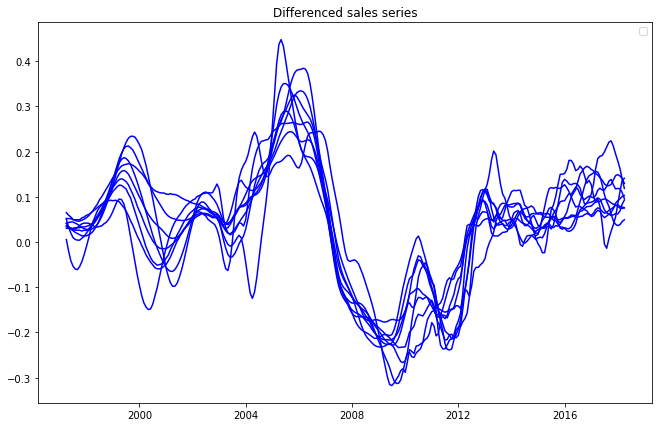

Zipcode,34472,34471,34476,34470,34482,34480,34474,34479,34475
1997-04-01,0.041673,0.040970,0.005525,0.036368,0.050994,0.034073,0.064950,0.030511,0.052107
1997-05-01,0.034427,0.043276,-0.019258,0.032952,0.033264,0.031509,0.059549,0.030408,0.051872
1997-06-01,0.029037,0.044398,-0.041102,0.031227,0.020145,0.028951,0.055500,0.030356,0.051755
1997-07-01,0.027166,0.044292,-0.053255,0.027848,0.010007,0.025127,0.050325,0.030305,0.049448
1997-08-01,0.028694,0.041797,-0.059800,0.026188,0.005690,0.021317,0.047688,0.031909,0.049448
1997-09-01,0.031962,0.039314,-0.060953,0.026145,0.004246,0.018786,0.046345,0.031855,0.049448
1997-10-01,0.036917,0.035633,-0.053994,0.026103,0.004228,0.016240,0.046229,0.031802,0.049337
1997-11-01,0.040274,0.031974,-0.043133,0.024411,0.008439,0.013707,0.048547,0.033392,0.053584
1997-12-01,0.041917,0.029501,-0.028209,0.025975,0.012614,0.013673,0.050659,0.033281,0.055385
1998-01-01,0.041847,0.028237,-0.010710,0.025850,0.019526,0.013623,0.053803,0.034801,0.059163


In [94]:
## rolling average set to 12 months
df_Ocala_log=np.log(df_Ocala) #log transformation first
Ocala_diff = df_Ocala_log.diff(periods=12) #need to check/verify what this is doing

fig = plt.figure(figsize=(11,7))
plt.plot(Ocala_diff, color='blue')
plt.legend(loc='best')
plt.title('Differenced sales series')
plt.show(block=False)

#missing the first rows at the beginning
Ocala_diff= Ocala_diff[12:]
Ocala_diff.head(10) 

#### Test_Dickey_Fuller

In [95]:
def test_dickey_fuller(ts_data_frame):
    for col in df_Ocala.columns:
        dftest = adfuller(ts_data_frame[col])
        dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
#         for key,value in dftest[4].items():
#             dfoutput['Critical Value (%s)'%key] = value
        print(dftest)

        print ('Results of Dickey-Fuller Test:')

        print(dfoutput) 

In [96]:
#performs a rolling mean
rolmean = Ocala_diff.rolling(window = 4).mean()
rolmean=rolmean[3:]
rolmean.head()
test_dickey_fuller(rolmean) 

(-2.80950612127962, 0.056928664015055246, 16, 233, {'1%': -3.458731141928624, '5%': -2.8740258764297293, '10%': -2.5734243167124093}, -2448.223387530372)
Results of Dickey-Fuller Test:
Test Statistic                  -2.809506
p-value                          0.056929
#Lags Used                      16.000000
Number of Observations Used    233.000000
dtype: float64
(-2.598371247225494, 0.09333436499557779, 15, 234, {'1%': -3.4586084859607156, '5%': -2.873972159235721, '10%': -2.57339565928848}, -2621.5267670015605)
Results of Dickey-Fuller Test:
Test Statistic                  -2.598371
p-value                          0.093334
#Lags Used                      15.000000
Number of Observations Used    234.000000
dtype: float64
(-2.5901091719369647, 0.0950587801717433, 15, 234, {'1%': -3.4586084859607156, '5%': -2.873972159235721, '10%': -2.57339565928848}, -2658.992135048303)
Results of Dickey-Fuller Test:
Test Statistic                  -2.590109
p-value                          0.09505

In [97]:
df_Ocala.columns

Index(['34472', '34471', '34476', '34470', '34482', '34480', '34474', '34479', '34475'], dtype='object', name='Zipcode')

In [98]:
test_dickey_fuller(df_Ocala)

(-3.1041140290937994, 0.026250226195299056, 6, 258, {'1%': -3.455952927706342, '5%': -2.8728086526320302, '10%': -2.572774990685656}, 3531.1765419032654)
Results of Dickey-Fuller Test:
Test Statistic                  -3.104114
p-value                          0.026250
#Lags Used                       6.000000
Number of Observations Used    258.000000
dtype: float64
(-2.1950138094249128, 0.20806013130126033, 5, 259, {'1%': -3.4558530692911504, '5%': -2.872764881778665, '10%': -2.572751643088207}, 3621.1883399817707)
Results of Dickey-Fuller Test:
Test Statistic                  -2.195014
p-value                          0.208060
#Lags Used                       5.000000
Number of Observations Used    259.000000
dtype: float64
(-2.4480120824467955, 0.12864115357430445, 5, 259, {'1%': -3.4558530692911504, '5%': -2.872764881778665, '10%': -2.572751643088207}, 3519.776473627016)
Results of Dickey-Fuller Test:
Test Statistic                  -2.448012
p-value                          0.12864

In [99]:
rolmean.dropna(inplace=True)
rolmean.tail(5)

Zipcode,34472,34471,34476,34470,34482,34480,34474,34479,34475
2017-12-01,0.134191,0.056736,0.075281,0.129459,0.085857,0.071644,0.060791,0.213033,0.031343
2018-01-01,0.140276,0.046078,0.078217,0.125419,0.082958,0.079105,0.060981,0.202592,0.050456
2018-02-01,0.144954,0.040282,0.079635,0.120228,0.080027,0.086770,0.063552,0.187019,0.072653
2018-03-01,0.145756,0.039916,0.079797,0.116014,0.077680,0.093524,0.069369,0.169107,0.096945
2018-04-01,0.141481,0.042406,0.078523,0.110626,0.075926,0.097827,0.076982,0.150020,0.118372


### Seasonal Decompose

In [101]:
rolmean.index

DatetimeIndex(['1997-07-01', '1997-08-01', '1997-09-01', '1997-10-01', '1997-11-01', '1997-12-01', '1998-01-01', '1998-02-01', '1998-03-01', '1998-04-01',
               ...
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01'], dtype='datetime64[ns]', length=250, freq=None)

#### 34471

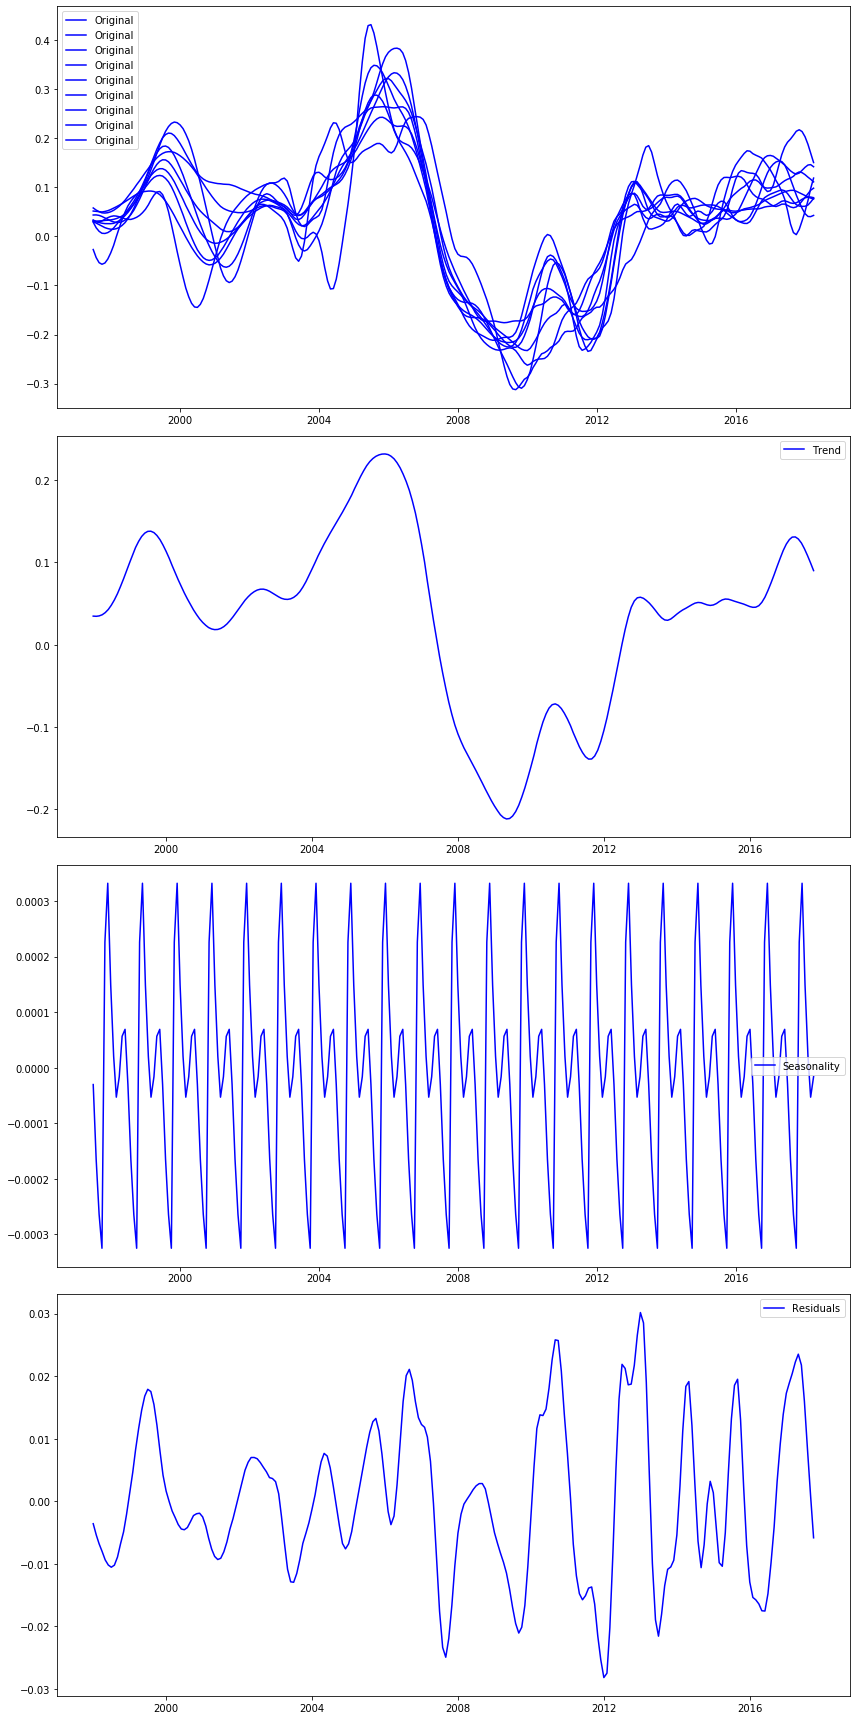

In [102]:
# import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(rolmean['34471'])

# Gather the trend, seasonality and noise of decomposed object
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,24))
plt.subplot(411)
plt.plot(rolmean, label='Original', color="blue")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.tight_layout()

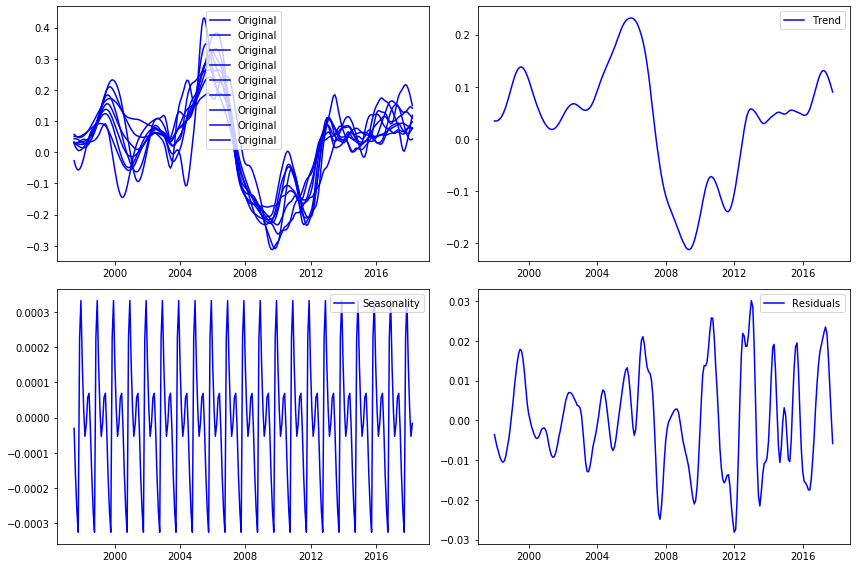

In [103]:
# import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(rolmean['34471'])

# Gather the trend, seasonality and noise of decomposed object
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(221)
plt.plot(rolmean, label='Original', color="blue")
plt.legend(loc='best')
plt.subplot(222)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.subplot(223)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(224)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.tight_layout()

#### 34474

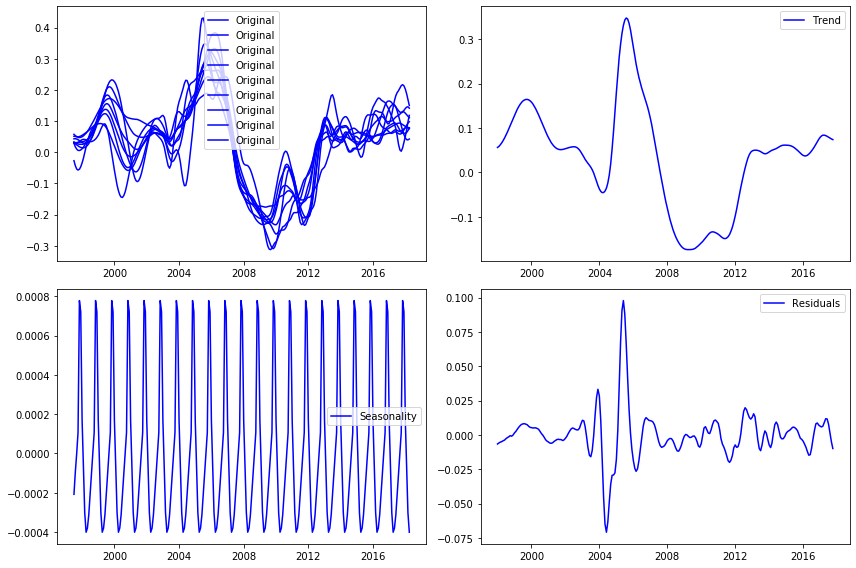

In [104]:
# import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(rolmean['34474'])

# Gather the trend, seasonality and noise of decomposed object
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(221)
plt.plot(rolmean, label='Original', color="blue")
plt.legend(loc='best')
plt.subplot(222)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.subplot(223)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(224)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.tight_layout()

#### 34476

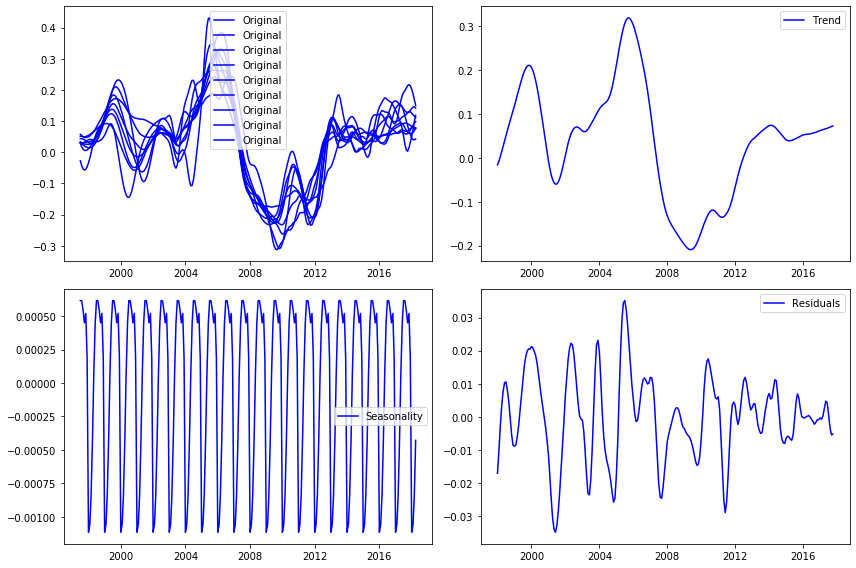

In [105]:
# import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(rolmean['34476'])

# Gather the trend, seasonality and noise of decomposed object
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(221)
plt.plot(rolmean, label='Original', color="blue")
plt.legend(loc='best')
plt.subplot(222)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.subplot(223)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(224)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.tight_layout()

#### 34480

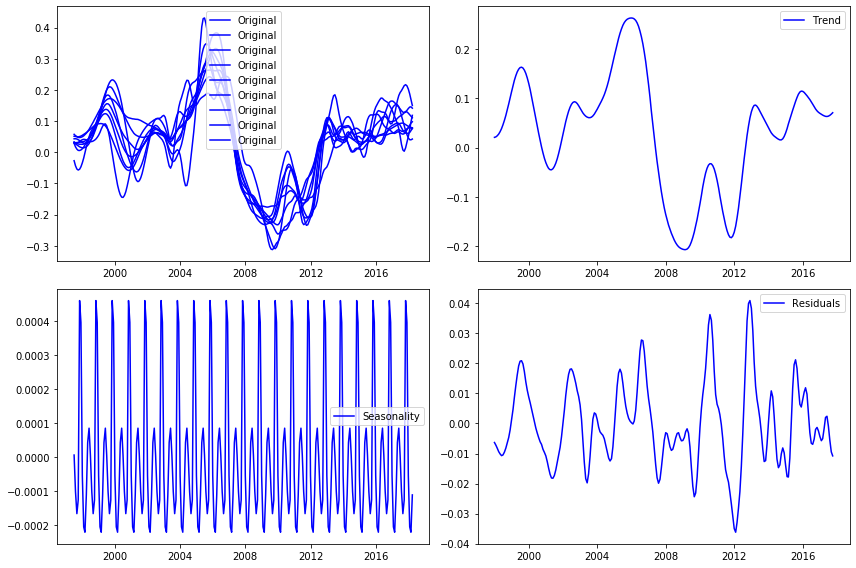

In [106]:
# import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(rolmean['34480'])

# Gather the trend, seasonality and noise of decomposed object
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(221)
plt.plot(rolmean, label='Original', color="blue")
plt.legend(loc='best')
plt.subplot(222)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.subplot(223)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(224)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.tight_layout()

#### 34482

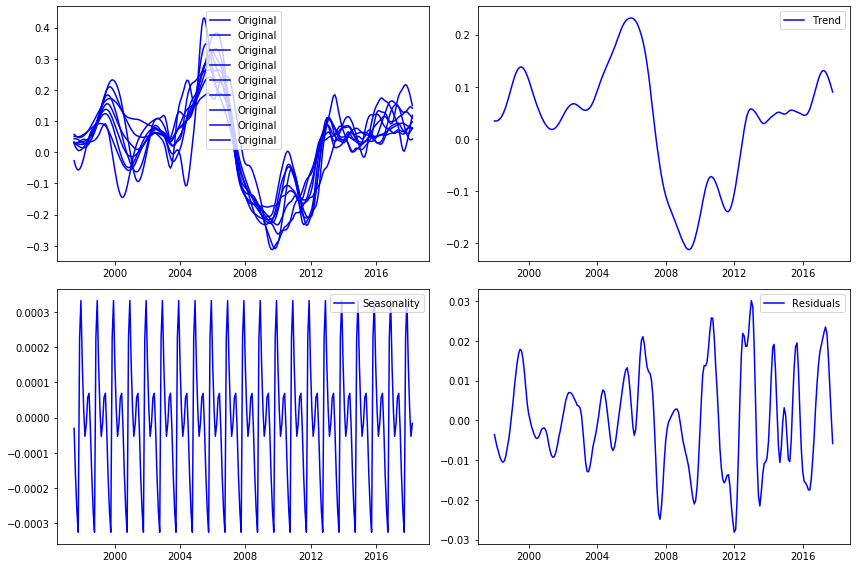

In [107]:
# import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(rolmean['34471'])

# Gather the trend, seasonality and noise of decomposed object
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(221)
plt.plot(rolmean, label='Original', color="blue")
plt.legend(loc='best')
plt.subplot(222)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.subplot(223)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(224)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.tight_layout()

#### Dropping NAN

In [108]:
df_Ocala_dc=decomposition.resid.dropna()
df_Ocala_dc.tail()

2017-06-01    0.021767
2017-07-01    0.016003
2017-08-01    0.008297
2017-09-01    0.000897
2017-10-01   -0.005832
Name: resid, dtype: float64